In [3]:
%run lib.ipynb

In [4]:
def Runge_kutta(d2ydx2, dydx, x0, y0, z0, xn, h):
    x = []   # y(x0) = y0 & dy/dx(x0) = z0
            #z = dy/dx
    y = []
    z = []
    x.append(x0)
    y.append(y0)
    z.append(z0)
    
    N = int((xn-x0)/h)# steps
    
    for i in range(N):
        x.append(x[i] + h)
        k1 = h * dydx(x[i], y[i], z[i])
        l1 = h * d2ydx2(x[i], y[i], z[i])
        k2 = h * dydx(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
        l2 = h * d2ydx2(x[i] + h/2, y[i] + k1/2, z[i] + l1/2)
        k3 = h * dydx(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
        l3 = h * d2ydx2(x[i] + h/2, y[i] + k2/2, z[i] + l2/2)
        k4 = h * dydx(x[i] + h, y[i] + k3, z[i] + l3)
        l4 = h * d2ydx2(x[i] + h, y[i] + k3, z[i] + l3)
        y.append(y[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
        z.append(z[i] + (l1 + 2*l2 + 2*l3 + l4)/6)
        
    return x, y, z

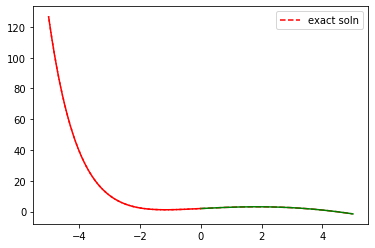

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Q2
def dydx(x,y,z):
    return z
def d2ydx2(x,y,z):
    return 1-x-z

sol_0to5  = Runge_kutta(d2ydx2,dydx,0,2,1,5,0.005)
sol_negative5to0 = Runge_kutta(d2ydx2,dydx,0,2,1,-5,-0.005)

x = np.arange(-5,5,0.01)
y = 1 + np.exp(-x)-x**2/2+2*x
plt.plot(x,y,"r--",label='exact soln')
plt.plot(sol_0to5[0],sol_0to5[1],"g-")
plt.plot(sol_negative5to0[0],sol_negative5to0[1],"r--")
plt.legend()
plt.show()